# Practical Session 5 - Parallel Markov chains with multiprocessing and dask

Students (pair):
- [Farah AMORRI]([link](https://github.com/farahamorri))
- [Olivia MILANO]([link](https://github.com/milanolivia))


**Useful references for this lab**:

[1] `seaborn`: [official tutorial](https://seaborn.pydata.org/tutorial.html)

[2] `multiprocessing`: [documentation](https://docs.python.org/3/library/multiprocessing.html), [doc2](https://he-arc.github.io/livre-python/multiprocessing/index.html)

[3] `dask`: [documentation](http://numba.pydata.org/) 

## <a name="content">Contents</a>
- [Exercise 1: seaborn, a useful tool for data visualisation](#ex1)
- [Exercise 2: Simulating a discrete-time homogeneous Markov chain](#ex2)
- [Bonus: Parallel computing with Dask](#bonus)
---

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: seaborn, a useful tool for data visualisation</a> [(&#8593;)](#content)
 
The `seaborn` package can significantly enhance data and data analysis visualization. See the [tutorial page](https://seaborn.pydata.org/tutorial.html) for examples of effective predefined graphics. An example aimed at visualizing the empirical distributions of 9 realizations of a bivariate Gaussian random vector is reported below.

/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_87756/1573286285.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_87756/1573286285.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_87756/1573286285.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_87756/1573286285.py:19: FutureWarning: 



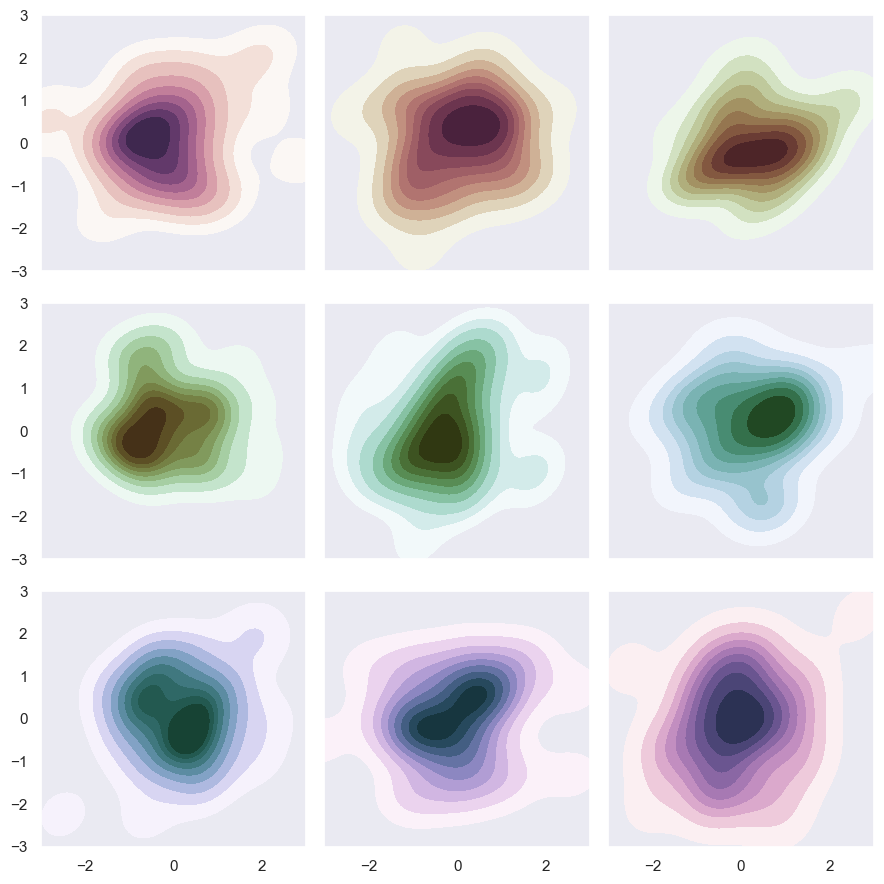

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="dark")
rng = np.random.default_rng(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rng.normal(size=(2, 50))
    sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

1. Comment on the lines of codes related to the `seaborn` library to make their role explicit. More specifically comment on the KDE method.

**Answer:**

/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_87756/3694981784.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_87756/3694981784.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_87756/3694981784.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)
/var/folders/pd/3sqbd7bj1rz10m02lgmm5zrh0000gn/T/ipykernel_87756/3694981784.py:37: FutureWarning: 



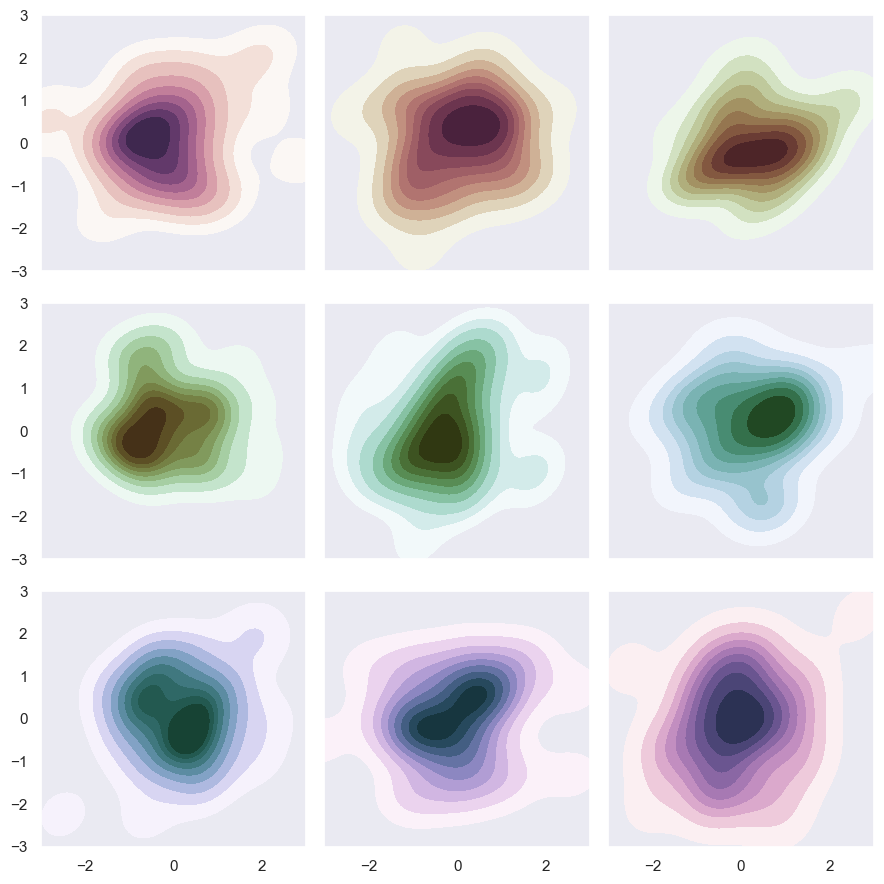

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the general aesthetic style for seaborn plots to "dark"
# This changes background, grid, and color defaults for better visualization.
sns.set(style="dark")

# Initialize a random number generator with a fixed seed for reproducibility.
rng = np.random.default_rng(50)

# Set up a 3x3 grid of subplots, sharing x and y axes for consistent scaling.
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting hue (color tone) around the cubehelix color palette circle.
# np.linspace(0, 3, 10) generates values from 0 to 3 to vary the color start points.
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a "cubehelix" colormap using seaborn.
    # - 'start=s' changes the hue starting point.
    # - 'light=1' controls the maximum lightness of the palette.
    # - 'as_cmap=True' returns a continuous colormap (not just a list of colors),
    #   which is suitable for use in density plots like kdeplot.
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate random bivariate (x, y) data from a standard normal distribution.
    x, y = rng.normal(size=(2, 50))

    # Plot a 2D Kernel Density Estimate (KDE) using seaborn.
    # - kdeplot estimates the probability density function of the data.
    # - 'x' and 'y' specify the two variables to estimate jointly.
    # - 'cmap=cmap' applies the cubehelix color map for density shading.
    # - 'shade=True' fills the area under the KDE contour, creating smooth color gradients.
    # - 'cut=5' extends the plot limits by 5 bandwidths beyond the data limits,
    #   ensuring that edge effects are minimized.
    # - 'ax=ax' specifies the subplot axis to draw the plot on.
    sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=ax)

    # Set the x and y limits for each subplot to keep all plots on the same scale.
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

# Adjust the layout so that subplots don’t overlap.
f.tight_layout()


2. For one of the realizations, take a look at the documentation of [`sns.jointplot`](https://seaborn.pydata.org/examples/joint_kde.html) to display both the 2-D empirical distribution of the data, and 1D histograms of their distribution along each axis. 

**Answer:**

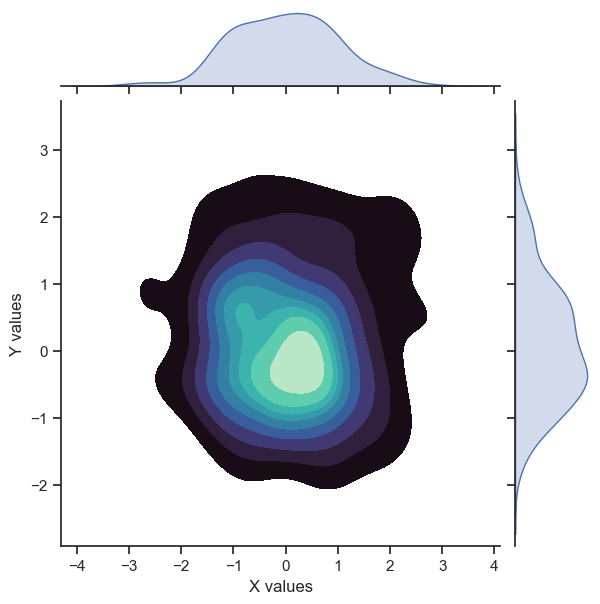

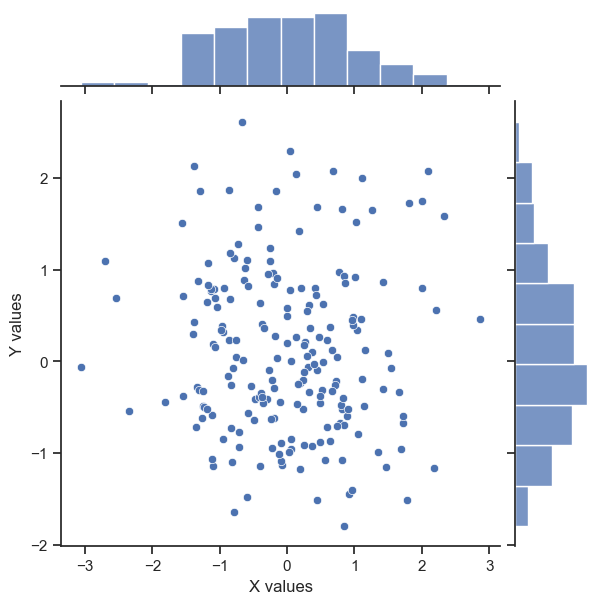

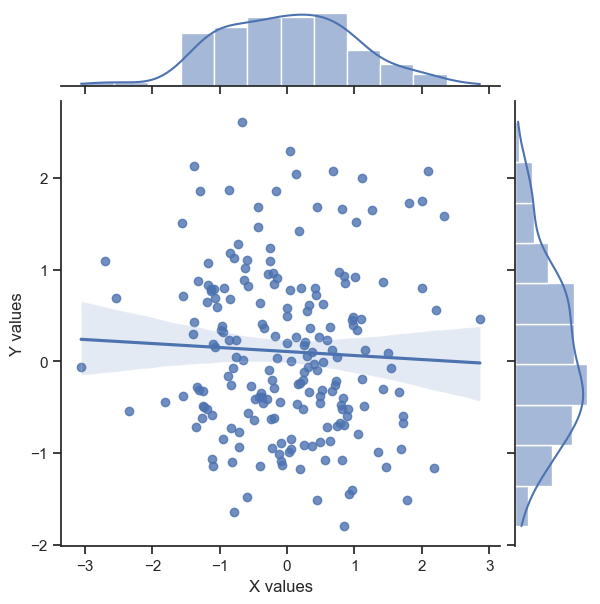

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
rng = np.random.default_rng(50)

# Generate one bivariate Gaussian sample
x, y = rng.normal(size=(2, 200))  # 200 points for smoother KDE
# Create a jointplot of x and y
g = sns.jointplot(
    x=x, 
    y=y,
    kind="kde",       # 2D KDE + marginal KDEs
    fill=True,        # fill the contours
    cmap="mako"       # color palette
)

e=sns.jointplot(x=x, y=y, kind="scatter")
f=sns.jointplot(x=x, y=y, kind="reg")

# Add axis labels
g.set_axis_labels("X values", "Y values", fontsize=12)
e.set_axis_labels("X values", "Y values", fontsize=12)
f.set_axis_labels("X values", "Y values", fontsize=12)
plt.show()


## <a name="ex2">Exercise 2: Simulating a discrete-time homogeneous Markov chain.</a> [(&#8593;)](#content)


Let ${(X_n)}_{n\geq 0}$ be a discrete-time homogeneous Markov chain with values over a finite ensemble $E=\{x_1,\dots,x_N\}$ identified to $\{1,\dots,N\}$. Consider $\boldsymbol{\rho} \in \Delta_N$, where $\Delta_N = \{\mathbf{x}\in\mathbb{R}^N \mid x_n \geq 0 \, \forall n \in \{1,\dotsc,N\} \text{ and } \sum_n x_n = 1 \}$ is the unit simplex in $\mathbb{R}^N$.

In the following, we consider the initial state of the chain $X_0$, following the discrete probability distribution:

$$
    \mathbb{P}(X_0 = k) = \rho_k, \qquad k \in \{1, \dots,  N\}.
$$
  
Let $\mathbf{A} = [a_{i,j}]_{i,j} \in \mathbb{R}^{N \times N}$ be the transition matrix of the chain, i.e.,

\begin{align*}
    &a_{i,j} = \mathbb{P}(X_{n+1} = j \mid X_{n} = i) \geq 0, \, \forall n \geq 0, \\
    &(\forall i \in \{1, \dotsc, N\}), \quad \sum_{j=1}^N a_{i,j} = 1.
\end{align*}
 
The chain is said to be homogeneous in that $\mathbf{A}$ does not depend from the time index $n$. Let $\tilde{a}_n$ represent the $n$th row of $\mathbf{A}$. 

The trajectory of the chain can be simulated as follows:

>- Draw the discrete random variable $X_0$ with distribution $\boldsymbol{\rho}$;
>
>- For $q = 0$ to $n_{\text{iter}}-1$
>    - Draw the discrete random variable $X_{q+1}$ with distribution $\tilde{a}_{X_{q}}$;
>    
>- Return ${(X_q)}_{0 \leq q \leq n_{\text{iter}}}$.


<!-- If $X_n = k$, we know that $T$, the life time of the chain in the state $k$ obeys a geometric distribution with parameter $a_{kk}$. We also know that the probability of transition from k to $\ell\neq k$ is given by:

$$
    \mathbb{P}(X_{n+1}=\ell | X_n=k, \ell\neq k) = \frac{a_{k\ell}}{1-a_{kk}}.
$$

 ### One possible algorithm to simulate a Markov chain is therefore:

    a. generate the initial state $X_0$ according to the discrete law $\{\rho_1,\dots,\rho_N\}$.

    b. at instant $n$, knowing that $X_n=k$,

    i) determine the life time $T$ in state $X_n=k$ by simulating a geometrical variable with parameter $a_{kk}$. As a consequence $X_n = \dots = X_{n+T} = k$. When $T=0$, we simply still have $X_n=k$.

    ii) determine next transition instant $n+T$, and determine the next state by using the probabilities of transition. -->

1. Implement the above algorithm in a function `X = markov(rho,A,nmax,rng)` with:
     - `rho`: law of the initial state (nonnegative vector of size $N$, summing to 1),
     - `A`: transition matrix (of size $N\times N$),
     - `nmax`: number of time steps,
     - `rng`: random number generator
     - `X`: trajectory of the chain.
     
In particular, check the input parameters `A` and `rho` make sense by adding appropriate assertions (or raising exceptions).

> Hint: the function `np.random.choice` can be useful to draw discrete random variables.

**Answer:**

In [ ]:
import numpy as np


def markov(rho, A, nmax, rng):

    rho = np.asarray(rho, dtype=float)
    A = np.asarray(A, dtype=float)
    N = len(rho)

    #Verifications
    if A.shape != (N, N):
        raise ValueError(f"Transition matrix A must be of shape ({N}, {N}), got {A.shape}")
    if np.any(rho < 0):
        raise ValueError("rho must have nonnegative entries.")
    if not np.isclose(np.sum(rho), 1.0, atol=1e-10):
        raise ValueError("Entries of rho must sum to 1.")
    if np.any(A < 0):
        raise ValueError("Transition matrix A must have nonnegative entries.")
    row_sums = A.sum(axis=1)
    if not np.allclose(row_sums, 1.0, atol=1e-10):
        raise ValueError("Each row of A must sum to 1.")


    X = np.zeros(nmax + 1, dtype=int)
    X[0] = rng.choice(np.arange(1, N + 1), p=rho)
    for i in range(nmax):
        current = X[i]
        transition_prob = A[current-1]
        X[i+1] = rng.choice(np.arange(1, N + 1), p=transition_prob)

    return X


2. Set the random number generator to a known state. Make a few simulations using simple transition matrices (*i.e.*, taking any nonnegative matrix $A=(a_{i,j})$ such that its lines sum to 1) and display the trajectory of the chains.

**Answer:**

In [10]:
rng = np.random.default_rng(seed=42)
A1 = np.array([[0.1, 0.9],
               [0.8, 0.2],])
rho1 = np.array([0.5, 0.5])
X1 = markov(rho1, A1, nmax=10, rng=rng)
print("Trajectory1 :", X1)

A3 = np.array([
    [0.5, 0.4, 0.1],
    [0.3, 0.5, 0.2],
    [0.05, 0.05, 0.9]
])
rho3 = np.array([1.0, 0.0, 0.0])
X3 = markov(rho3, A3, nmax=20, rng=rng)
print("Trajectory2 :", X3)

Trajectory1 : [1 2 1 1 2 1 1 2 2 2 1]
Trajectory2 : [1 1 1 1 1 2 2 3 3 3 3 3 3 3 3 2 2 2 3 3 3]


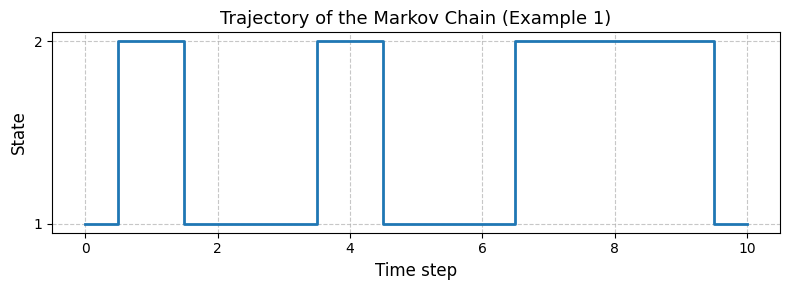

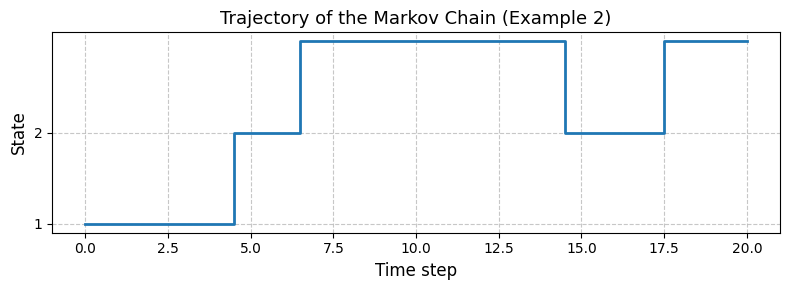

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.step(range(len(X1)), X1, where='mid', linewidth=2)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Trajectory of the Markov Chain (Example 1)", fontsize=13)
plt.yticks([1, 2])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 3))
plt.step(range(len(X3)), X3, where='mid', linewidth=2)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Trajectory of the Markov Chain (Example 2)", fontsize=13)
plt.yticks([1, 2])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Explore the potential of the [`multiprocessing` package](https://docs.python.org/3/library/multiprocessing.html) to simulate several Markov chains in parallel.

> Hint: the `mutiprocessing.Pool.starmap` or `mutiprocessing.Pool.starmap_async` methods could be useful.

**Answer:**

In [20]:
from multiprocessing.dummy import Pool

rng = np.random.default_rng(42)
nmax = 10
items = [(rho1, A1, nmax, rng), (rho3, A3, nmax, rng)]

with Pool() as pool:
    for result in pool.starmap(markov, items):
            print(f'Got result: {result}', flush=True)


with Pool() as pool:
    for result in pool.starmap_async(markov, items).get():
        print(f'Got result (async): {result}', flush=True)


Got result: [2 2 1 2 1 2 1 2 1 2 1]
Got result: [1 3 3 3 3 3 3 3 3 3 3]
Got result (async): [1 2 1 2 2 1 2 2 1 2 2]
Got result (async): [1 1 1 2 2 2 2 2 2 2 3]


4. [Bonus] Generate Markov chains in parallel with the [`dask`](https://docs.dask.org/en/latest/futures.html) library, which offers more general parallelization functionalities (with, for instance, the use of [`Futures`](https://docs.dask.org/en/stable/futures.html), see tutorial [here](https://tutorial.dask.org/05_futures.html)). A useful example is provided [here](https://stackoverflow.com/questions/41471248/how-to-efficiently-submit-tasks-with-large-arguments-in-dask-distributed). Note that `dask` is much more versatile and powerful than `multiprocessing`, and can be useful to scale algorithms over multiple cores and/or computing nodes.

**Answer:**

In [31]:
from dask.distributed import Client

rng = np.random.default_rng(42)
nmax = 10
items = [(rho1, A1, nmax, rng), (rho3, A3, nmax, rng)]

client = Client(processes=False)

futures = [client.submit(markov, *item) for item in items]
results = client.gather(futures)
for r in results:
    print("Got result (Dask):", r)


Got result (Dask): [1 2 1 2 1 2 2 1 2 1 2]
Got result (Dask): [1 1 1 1 1 1 3 3 3 3 3]


/Users/oliviamilano/Desktop/python_sdia/venv/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62940 instead
  warnings.warn(


2025-10-09 22:12:27,781 - distributed.worker - ERROR - Compute Failed
Key:       compute_TV_delayed-3d98c0d9-644d-4215-a856-bfcd4e10caae
State:     executing
Task:  <Task 'compute_TV_delayed-3d98c0d9-644d-4215-a856-bfcd4e10caae' compute_TV_delayed(...)>
Exception: "TypeError('Delayed objects of unspecified length are not iterable')"
Traceback: '  File "/var/folders/7x/5z5j8nzn73j56x9hr4346d_80000gn/T/ipykernel_84929/2163240370.py", line 13, in compute_TV_delayed\n    Gx, Gy = gradient2D_delayed(X)\n    ^^^^^^\n  File "/Users/oliviamilano/Desktop/python_sdia/venv/lib/python3.11/site-packages/dask/delayed.py", line 773, in __iter__\n    raise TypeError("Delayed objects of unspecified length are not iterable")\n'



## <a name="bonus">Bonus: Parallel computing with Dask</a> [(&#8593;)](#content)

1. Take a look at the [`dask.array` documentation](https://docs.dask.org/en/stable/array-best-practices.html) and the associate [tutorial](https://tutorial.dask.org/02_array.html). Apply some of the functions introduced herein and in the [documentation](https://docs.dask.org/en/stable/array-best-practices.html) to parallelize the computation of the total variation investigated during session 2. Note that you can combine `dask` and `numba` to obtain an overall more efficient implementation. Note that timing can be worse than Numpy (`dask.array` is more specifically interesting when the data do no fit in memory).

2. Take a look at the [`dask.delayed` tutorial](https://tutorial.dask.org/03_dask.delayed.html), and go through some of the examples provided. [Best practices with the `dask.delayed` interface](https://docs.dask.org/en/stable/delayed-best-practices.html) are summarized in the documentation.

> **Remark**: an alternative to Dask: the [Ray](https://docs.ray.io/en/latest/) library.

**Answer:**

In [61]:
import numpy as np

import timeit

# NUMPY

def gradient2D(X):
    # print(X.ndim)
    assert(X.ndim < 3) , "input matrix shape must be 2-dimensional"

    Gx = np.zeros_like(X)
    Gy = np.zeros_like(X)

    Gx[:, :-1] = X[:, 1:] - X[:, :-1]
    Gy[:-1, :] = X[1:, :] - X[:-1, :]

    return (Gx,Gy)

def compute_TV(X):
    Gx, Gy = gradient2D(X)

    Gx_sqr = Gx**2
    Gy_sqr = Gy**2

    elt_sqrt = np.sqrt(np.add(Gx_sqr, Gy_sqr))

    Tv = np.sum(elt_sqrt)

    return Tv

In [62]:
import numba

# NUMBA
@numba.njit
def gradient2D_numba(X):
    Gx = np.zeros_like(X)
    Gy = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]-1):
            Gx[i, j] = X[i, j+1] - X[i, j]

    for i in range(X.shape[0]-1):
        for j in range(X.shape[1]):
            Gy[i, j] = X[i+1, j] - X[i, j]

    return (Gx, Gy)

@numba.njit
def compute_TV_numba(X):
    Gx, Gy = gradient2D_numba(X)
    Tv = 0.0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Tv += np.sqrt(Gx[i, j]**2 + Gy[i, j]**2)
    return Tv

In [63]:
import dask.array as da

# DASK

def gradient2D_dask(X):
    """
    Compute gradients using Dask arrays.
    Equivalent to the NumPy version, but parallelized.
    """
    assert X.ndim == 2, "Input matrix must be 2D"

    # Preallocate arrays lazily
    Gx = da.zeros_like(X)
    Gy = da.zeros_like(X)

    # Compute finite differences
    Gx = da.concatenate([X[:, 1:] - X[:, :-1], da.zeros((X.shape[0], 1), chunks=(X.chunks[0], (1,)))], axis=1)
    Gy = da.concatenate([X[1:, :] - X[:-1, :], da.zeros((1, X.shape[1]), chunks=((1,), X.chunks[1]))], axis=0)

    return Gx, Gy

def compute_TV_dask(X):
    """
    Compute total variation using Dask arrays.
    """
    Gx, Gy = gradient2D_dask(X)
    Tv = da.sqrt(Gx**2 + Gy**2).sum()
    return Tv.compute()

In [64]:
from dask import delayed

@delayed
def gradient2D_delayed(X):
    Gx = np.zeros_like(X)
    Gy = np.zeros_like(X)
    Gx[:, :-1] = X[:, 1:] - X[:, :-1]
    Gy[:-1, :] = X[1:, :] - X[:-1, :]
    return Gx, Gy

@delayed
def compute_TV_delayed(X):
    Gx, Gy = gradient2D_delayed(X)
    Tv = np.sum(np.sqrt(Gx**2 + Gy**2))
    return Tv.compute()

In [65]:
@numba.njit
def gradient2D_numba(X):
    Gx = np.zeros_like(X)
    Gy = np.zeros_like(X)
    Gx[:, :-1] = X[:, 1:] - X[:, :-1]
    Gy[:-1, :] = X[1:, :] - X[:-1, :]
    return Gx, Gy

def compute_TV_dask_numba(X):
    X_delayed = X.to_delayed().ravel()  # list of blocks
    results = [delayed(lambda b: np.sum(np.sqrt((gradient2D_numba(b)[0]**2 + gradient2D_numba(b)[1]**2))))(block)
               for block in X_delayed]
    return da.from_delayed(sum(results), shape=(), dtype=float).compute()

In [70]:
from dask.diagnostics import ProgressBar
rng = np.random.default_rng(42)
m, n = 1000, 1000
X = rng.random((m, n))

# Trigger Numba compilation once
compute_TV_numba(X)

# Prepare Dask array (chunked)
X_dask = da.from_array(X, chunks=(500, 500))


time_numpy = timeit.timeit(lambda: compute_TV(X), number=10)
time_numba = timeit.timeit(lambda: compute_TV_numba(X), number=10)
time_dask  = timeit.timeit(lambda: compute_TV_dask(X_dask), number=10)
time_dask_delayed = timeit.timeit(lambda: compute_TV_delayed(X_dask), number=10)
time_dask_numba = timeit.timeit(lambda: compute_TV_dask_numba(X_dask), number=10)


print("Résultat NumPy :", compute_TV(X))
print("Résultat Numba :", compute_TV_numba(X))
with ProgressBar():
    print("Résultat Dask  :", compute_TV_dask(X_dask))
    print("Résultat Dask delayed :", compute_TV_delayed(X_dask))
    print("Résultat Dask Numba :", compute_TV_dask_numba(X_dask))


print(f"Temps NumPy : {time_numpy:.5f} s")
print(f"Temps Numba : {time_numba:.5f} s")
print(f"Temps Dask  : {time_dask:.5f} s")
print(f"Temps Dask delayed : {time_dask_delayed:.5f} s")
print(f"Temps Dask Numba : {time_dask_numba:.5f} s")


Résultat NumPy : 517248.6641108156
Résultat Numba : 517248.6641107963
Résultat Dask  : 517248.6641108156
Résultat Dask delayed : Delayed('compute_TV_delayed-e39736bc-4f89-4c00-b01c-5ee4c4fbc511')
Résultat Dask Numba : 516889.48965605017
Temps NumPy : 0.07375 s
Temps Numba : 0.02932 s
Temps Dask  : 1.07209 s
Temps Dask delayed : 0.00280 s
Temps Dask Numba : 0.56652 s


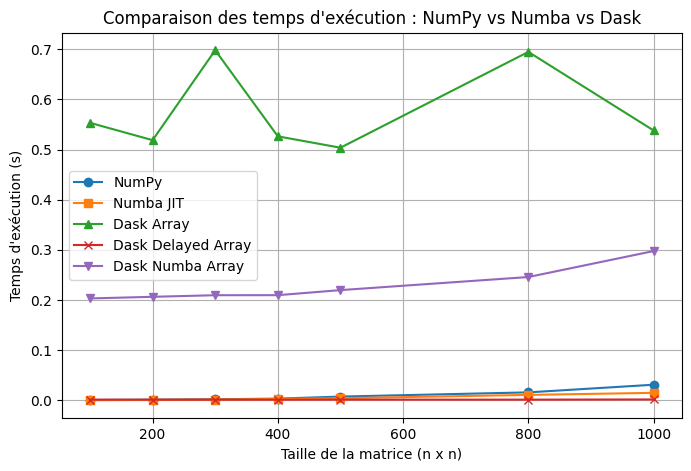

In [72]:
sizes = [100, 200, 300, 400, 500, 800, 1000]
times_numpy = []
times_numba = []
times_dask = []
times_dask_delayed = []
times_dask_numba = []
rng = np.random.default_rng(42)

# Précompile Numba
compute_TV_numba(np.random.rand(50, 50))

for size in sizes:
    X = rng.random((size, size))
    X_dask = da.from_array(X, chunks=(size//2, size//2))

    t_numpy = timeit.timeit(lambda: compute_TV(X), number=5)
    t_numba = timeit.timeit(lambda: compute_TV_numba(X), number=5)
    t_dask  = timeit.timeit(lambda: compute_TV_dask(X_dask), number=5)
    t_dask_delayed = timeit.timeit(lambda: compute_TV_delayed(X_dask), number=5)
    t_dask_numba = timeit.timeit(lambda: compute_TV_dask_numba(X_dask), number=5)

    times_numpy.append(t_numpy)
    times_numba.append(t_numba)
    times_dask.append(t_dask)
    times_dask_delayed.append(t_dask_delayed)
    times_dask_numba.append(t_dask_numba)


# Plot
plt.figure(figsize=(8,5))
plt.plot(sizes, times_numpy, marker='o', label="NumPy")
plt.plot(sizes, times_numba, marker='s', label="Numba JIT")
plt.plot(sizes, times_dask, marker='^', label="Dask Array")
plt.plot(sizes, times_dask_delayed, marker='x', label="Dask Delayed Array")
plt.plot(sizes, times_dask_numba, marker='v', label="Dask Numba Array")
plt.xlabel("Taille de la matrice (n x n)")
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison des temps d'exécution : NumPy vs Numba vs Dask")
plt.legend()
plt.grid(True)
plt.show()